In [1]:
### BEGIN hide_toggle
### Update 30/10-'20
def hide_toggle_code(off=0):
    """This function generates HTML code to toggle the display of an input
    cell.
    
    The output of the cell will still be displayed.  This can be used
    to hide (from immediate view) some code to generate data or the
    like.  It can also be used to hide other notebook explicit
    implementations - e.g., C++ processing, or the like.
    
    Note, calling this function alone will not enable toggling.
    Instead, we must wrap the generated code in an
    `IPython.display.HTML` object and return that as the cell value.
    This will let IPython evaluate the HTML code and pass it on to the
    browser.
    
    If all one wants is to toggle a cell one can use the function
    `hide_toggle` below.  However, we can also combine the code
    generated here with other HTML code - for example _style_
    declarations and pass that along embedded in an HTML object.
    
    Parameters
    ----------
    off : int 
        Offset of cell to hide relative to the cell calling this function 
    
    Returns
    -------
    code : str 
        HTML code to enable toggling of the cell

    """
    from random import randint 
    from IPython.display import HTML 
    
    jp_cell     = 'document.getElementsByClassName("jp-Cell jp-mod-selected")[0]'
    jq_cell     = '$("div.cell.code_cell.rendered.selected")'
    toggle_text = 'Please close'
    cell_id     = str(randint(1,2**64))
    func_name   = f'code_toggle_{cell_id}'
    
    scr1 = f'''
    <script id="s{cell_id}">
      function {func_name}() {{
          if (typeof $ == "undefined") {{
              // console.log("For JupyterLab (no jQuery)")
              var c  = {jp_cell};
              // console.log(c);
              var iw = c.getElementsByClassName("jp-Cell-inputArea")[0];
              var op = c.getElementsByClassName("jp-OutputPrompt")[0];
              // console.log(iw,op)
              if (iw.style.display !== undefined && iw.style.display === "none") {{
                  iw.style.display = null;
                  op.style.display = null;
              }} else {{
                  iw.style.display = "none";
                  op.style.display = "none";
              }}
           }}
           else {{
                console.log('Will toggle input display {jp_cell}')
                console.log({jp_cell})
                {jq_cell}.find("div.input").toggle();
                {jq_cell}.find("div.out_prompt_overlay.prompt").toggle();
                {jq_cell}.find("div.out_prompt_overlay.prompt").toggle();
                {jq_cell}.find("div.prompt.output_prompt").toggle();
                console.log('End toggle input display {jp_cell}')
           }}
      }}  
    </script>
    '''
    but = f'''
     <details style='z-index:99;position:relative;color:lightgray;' 
             onclick='javascript:{func_name}()'>
        <summary>&gt;</summary>
    </details>
    '''
    scr2 = f'''
    <script>
      var c = null;
      if (typeof $ == "undefined") {{
         var c  = document.getElementById("s{cell_id}");
         var p  = c.parentNode.parentNode.parentNode.parentNode.parentNode;
         var iw = p.getElementsByClassName("jp-Cell-inputArea")[0];
         var op = p.getElementsByClassName("jp-OutputPrompt")[0];
         var ou = c.parentNode;
         iw.style.display = "none";
         op.style.display = "none";
         ou.style.background = "transparent";
      }}
      else {{
          var p = $('#s{cell_id}').parents();
          p.siblings('div.input').hide();
          p.find('div.prompt.output_prompt').hide()
          p.find('div.out_prompt_overlay.prompt').hide()      
      }}
      // {func_name}
    </script>
    '''
    return scr1+but+scr2        

def hide_toggle(off=0,cnt=None):
    """This will wrap the HTML code returned from the above function
    in an `IPython.display.HTML` object so that the notebook will 
    evaluate the HTML code. 
    
    This function is what we will use most of the time.  However, 
    the function `hide_toggle_code` can be combined with other code 
    and then be put  into an HTML object to let the notebook evaluate
    all the code. 

    Parameters 
    ----------
    off : int 
        Cell offset relative to calling cell which we should toggle 
    cnt : int or None 
        If not None, set the execution count to this number 
        (currently broken)
        
    Returns
    -------
    object : IPython.display.HTML 
        HTML object wrapping code to toggle cell 
    """
    from IPython.display import HTML
    if cnt is not None:
        get_ipython().execution_count = cnt
    return HTML(hide_toggle_code(off))
### END hide_toggle


### BEGIN setup_matplotlib
### Update 30/10-'20
def _setup_matplotlib():
    """Set-up Matplotlib parameters. 
    
    We specify that we want both PDF and PNG images, and 
    that the default image size should be 8 by 8 inches 
    
    We also disable warnings about too many open figures 
    """
    %matplotlib inline 
    from matplotlib import rcParams 
    
    rcParams['figure.max_open_warning'] = 0
    rcParams['font.serif'] = ['Palatino'] + rcParams['font.serif']
    rcParams['font.family'] = ['serif']
    rcParams['mathtext.fontset'] = 'dejavuserif'
    rcParams['axes.formatter.use_mathtext'] = True

    f = None
    try:
        # IPython >= 7.23 depcrates set_matplotlib_formats
        from matplotlib_inline.backend_inline import set_matplotlib_formats
        f = set_matplotlib_formats
        
    except Exception as e:
        try:
            from IPython.display import set_matplotlib_formats
            f = set_matplotlib_formats
        except Exception as e:
            pass 

    if f is not None:
        set_matplotlib_formats('png','pdf')
        
_setup_matplotlib()
### END setup_matplotlib
_setup_matplotlib()

### BEGIN css_styling
### Update 30/10-'20
def css_styling_code():
    """This function returns HTML code to customize the CSS 
    of the notebook 
    
    - The text font to be Palatino (serif)
    - Headers are oblique (italic)
    - Extra spacing below H1 headers 
    - Extra spacing spacing above H1 headers 
    - Headers have larger fonts, and is set in normal weight
    - Remove padding around code cells 
    - Code uses the fint "Source Code Pro" (or monospace)
    - Code background is changed to light yellow 
    - Output background is set to lavender
    
    The function combines these CSS declarations with the HTML 
    code from `hide_toggle_code` above so what we automatically 
    hide this code from the user. 
    """
    styles = '''
    <style>
    .rendered_html, .jp-RenderedHTMLCommon {
        font-family: Palatino, serif
    }
    h1, h2, h3, h4, .jp-RenderedHTMLCommon h1, .jp-RenderedHTMLCommon h2, .jp-RenderedHTMLCommon h3, .jp-RenderedHTMLCommon h4{
        font-style: oblique;  
    }
    jp-RenderedHTMLCommon h1:first-child {
        margin-top: 4ex;
    }
    .jp-RenderedHTMLCommon h1, .rendered_html h1 {
        margin-bottom: 2ex;
        font-weight: normal;
        font-size: 220%;
    }
    .jp-RenderedHTMLCommon h2, .rendered_html h2 {
        font-weight: normal;
        font-size: 180%;
    }
    .jp-RenderedHTMLCommon h3, .rendered_html h3 {
        font-weight: normal
    }
    .jp-RenderedHTMLCommon h4, .rendered_html h4 {
        font-weight: normal
    }
    p code {
        padding: 0;
    }
    .CodeMirror, .jp-Notebook .CodeMirror.cm-s-jupyter, code, div.input_area {
        font-family: "Source Code Pro", source-code-pro,Consolas, monospace;
        background: lightyellow;
    }
    .output_text, .output_stream, .output_stdout, .jp-OutputArea-executeResult .jp-OutputArea-output {
        background: lavender;
    }
    .output_error {
        background-color: #fff2f2;
    }
    .celltag_alert-info li {
        list-style-image:  url(data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAABAAAAAQCAYAAAAf8/9hAAAAAXNSR0IArs4c6QAAAAZiS0dEAP8A/wD/oL2nkwAAAAlwSFlzAAALEwAACxMBAJqcGAAAAAd0SU1FB9gEGxE4IQYzJ14AAAI3SURBVDjLZZNPSFVBFIe/e9+zd3silBCl0SZoU4s2rVq0EB5tQip4UNvATVGu3QRBiyAi2iltWkgbF5EgRhFFRpiWtrWIzDIV1Pzz7p15M2fmtvDevOqBw8DM9zvnN8ycgF3R/eDtM2mac96ZdrFNxBikqbRV+vHH/ut9gAZczoe7C3gnF0f6au1OLM5avFi8d1Ea+JvAMSAq8nsKOGs5f2cYJ3Y7rc2PO4BqkS8DdD98f9tbe1ysCoxOBo1qlEXHJWcM4b5KPU19zleA0o4Clx99eO3EdqVewHsCoFRugUoVghJO7A6H6Vx9wdtYi27cr5x6dy/03nVtWTU7bWeZh6jNUcAiCaFTURl9A+gs56AviHzh3mnqtdPxm6knfQPLU7UaokASQq/agY7yDrG16Mba6Pz48NP56VdrgAApYObGaicPtkovToFLQBKA/WUxTe3FRk4san15aGKgd3Dj560rrdGJS6FT0X9YYvLuiMKL1kAQOpHZ3PqfyZfP41+9PW1VfzX0RXFSECfgNEmSTgImdDruF2O0E8vvqZG1auQubAsKooIYYHpGvwA2g+xndQBHgWa6cG0ih5cW/w6VvEq3nChwCoBvs+bL2Z7VceBHGTDAIrABpMVuhw+4OiLgLIglOLPYBTQAlfErIeCzjRVg1dtEb1kt5Omv+DTV2YssAN+zNdkzC42N9brV8WdvYp07seOdM2Of1F3AAknW0AJpwN6IgEPAEaANaMlcbmZdl7KRBuAfAb+v//yMAJoAAAAASUVORK5CYII=);
    }
    </style>
    <script>
    if (typeof $ !== "undefined") {
  $(function(){
 $(".celltag_alert         .text_cell_render").addClass("alert");
 $(".celltag_alert-info    .text_cell_render").addClass("alert alert-info");
 $(".celltag_alert-warning .text_cell_render").addClass("alert alert-warning");
 $(".celltag_alert-danger  .text_cell_render").addClass("alert alert-danger");
 $(".celltag_alert-success .text_cell_render").addClass("alert alert-successs");
      });
    }
    </script>
    '''
    return styles

def css_styling():
    from IPython.display import HTML 
    
    return HTML(hide_toggle_code()+css_styling_code())
### END css_styling
css_styling()

### Christian Holm Christensen <a class='tocSkip'></a>

# Fast Fourier Transforms<a class='tocSkip'></a>
## Using Python <a class='tocSkip'></a>
## Version 0.1 - September 2019 (English)<a class='tocSkip'></a>

> In this note, we will illustrate the use of Fast Fourier Transforms (FFT) on some simple examples. 
>
> This document is available in many formats at https://cholmcc.gitlab.io/nbi-python

### Niels Bohr Institutet <a class='tocSkip'></a>

# Introduction

Fourier transformations are often the first step in the analysis of data.  By transform the data under consideration from the _observation_ domain (often called the _time_ domain) to the _Fourier_ (or _frequency_) domain, a lot of problem with signal processing and extraction can be easily solved. 

In this note, we will take a look at some examples of using _Discrete Fourier Transforms_ (DFT) for processing data. 

In [2]:
import numpy as np 
import matplotlib.pyplot as plt

# Wave analysis 

Suppose we have the data 

$$y_i = \cos(x_i) + 2\cos(2x_i + \pi/4)\quad,$$ 

evaluated at 100 points on the domain $[2\pi,8\pi]$.  

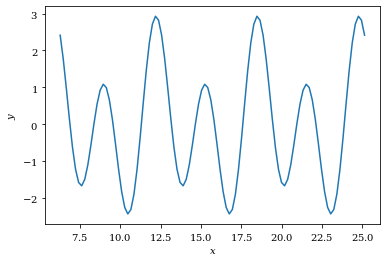

In [3]:
x = np.linspace(2*np.pi,8*np.pi,100)
y = np.cos(x) + 2*np.cos(2*x+np.pi/4)
plt.figure()
plt.plot(x,y)
plt.xlabel('$x$')
plt.ylabel('$y$');

We would now like to do a Fourier transform of this data so that we can extract the amplitudes and phases of each component in $y$.  We use the _NumPy_ function `np.fft.fft` to do so.  A discrete Fourier transform, which this function performs, evaluates 

$$f_k = \sum_{j=0}^{N-1} y_j e^{-ik2\pi\frac{j}{N}}\quad\text{for}\ k=-(N-1),\ldots,N-1\quad,$$ 

where $i=\sqrt{-1}$ is the imaginary unit, and $k$ is the _frequency_ number. 

Note, that $f_k=a_k+ib_k$ are in general complex numbers, and $|f_k|=\sqrt{a_k^2+b_k^2}$ and $\mathrm{arg}(f_k)=\tan^{-1}(b_k/a_k)$ corresponds to the _amplitude_ and _phase_, respectively, of the $k$ frequency.   This means, that once we have done our Fourier transform, we can directly see which frequencies have the highest amplitude and by which phase they are shifted.  

If our data $y_i$ is defined over the real interval $[a,b]$, then the $k$ frequency in that space is given by 

$$\nu_k = \frac{k}{N}\frac{|b-a|}{2\pi}\quad.$$ 

Thus, we do _not_ pass our domain to the fast Fourier transform, since the `np.fft.fft` assumes we have mapped onto $[-\pi,+\pi]$.  Also note, that `np.fft.fft` returns the coefficients $f_k$ in _packed_ form.  That means that the returned array has the form 

$$\{f_0, f_1, f_2,\ldots,f_{\lfloor N/2-1\rfloor},f_{\lfloor N/2\rfloor},f_{\lfloor N/2-1\rfloor},\ldots,f_{-2},f_{-1}\}\quad,$$ 

where the element $f_{\lfloor N/2\rfloor}\}$ is called the _Nyquist_ component and is available _only_ if $N$ is even.  Note, if $y_i$ is real, then 

$$f_{-k} = f_{k}^{\dagger}\quad,$$ 

meaning they are redundant.  In that case, one may opt to use the function `np.fft.rfft`. 

Let us know do the Fourier transform on our data `y` above.  

In [4]:
f = np.fft.fft(y,norm='ortho')

We can plot the _amplitudes_ and _phases_ as a function of the frequencies. _NumPy_ provides us with a function `np.fft.fftfreq` which calculates the frequencies relative to our $x$ domain.  We must pass the number of points $N$, and $\frac{|b-a|}{N}$ - the length of our domain divided by number of points, to get the numbers.  

In [5]:
nu = np.fft.fftfreq(len(x),(x[-1]-x[0])/(2*np.pi)/len(x))

Now we are in a position to plot the result of the FFT.  On the left, we put the amplitudes and on the right we show the phases.  We use the _NumPy_ functions `np.abs` and `np.angle` to calculate the amplitudes and arguments (phases), respectively, or each $f_k$. 

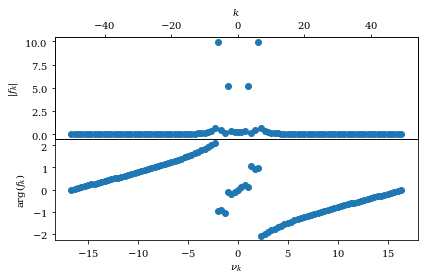

In [6]:
amp = np.abs(f)
pha = np.angle(f)
fig, ax = plt.subplots(nrows=2,gridspec_kw=dict(hspace=0))
ax[0].plot(nu,amp,'o')
ax[0].set_ylabel(r'$|f_k|$')
ax[1].plot(nu,pha,'o')
ax[1].set_xlabel(r'$\nu_k$')
ax[1].set_ylabel(r'$\mathrm{arg}(f_k)$')
tax = ax[0].twiny()
tax.plot(np.fft.fftfreq(len(nu),1/len(nu)),amp,'.')
tax.set_xlabel('$k$')
fig.tight_layout()

We see that some amplitudes are significantly larger than all other amplitudes.  We can inspect these amplitudes and corresponding phases and frequencies to learn more about our data.  Let us find mapping so that we have the amplitudes sorted from the largest to the lowest.  We do not want sort the `f` array directly.  Instead we will use a _quick-sort_ algorithm to get an mapping of indexes.  Note that `np.argsort` returns a sorted index array in _ascending_ order.  We want the _descending_ order, so we reverse the array. 

In [7]:
idx = np.flip(np.argsort(amp))

The array `idx` now lists the indexes of `f` in descending order of the amplitudes.  Let us see the first ten elements 

In [8]:
print(idx[:10])

[94  6  3 97  7 93 95  5  2 98]


Since our input data is real, we know that there is a redundancy between positive and negative frequencies, which is why we see the symmetry in `idx`.  Thus, to get the 5 most significant amplitudes and phases, we should only take every second element of `abs` and `pha` indexed by `idx`.  Let us print out the five most significant amplitudes and phases 

In [9]:
for nn,kk,aa,pp in zip(nu[idx][1:10:2],
                       idx[1:10:2],
                       amp[idx][1:10:2],
                       pha[idx][1:10:2]):
    print('Frequency: {:7.4g} ({:2d}) '
          'Wavelength: {:6.4g}*2pi '
          'Amplitude: {:6.4g} '
          'Phase: {:6.4g}'
          .format(nn,np.abs(kk),
                  1/np.abs(nn),aa,pp))

Frequency:       2 ( 6) Wavelength:    0.5*2pi Amplitude:  9.916 Phase: 0.9712
Frequency:      -1 (97) Wavelength:      1*2pi Amplitude:  5.206 Phase: -0.1119
Frequency:  -2.333 (93) Wavelength: 0.4286*2pi Amplitude: 0.6583 Phase:  2.089
Frequency:   1.667 ( 5) Wavelength:    0.6*2pi Amplitude: 0.5274 Phase: 0.9146
Frequency: -0.6667 (98) Wavelength:    1.5*2pi Amplitude: 0.3396 Phase: -0.2159


We see that the two components corresponding to wavelengths of $\pi$ and $2\pi$ are the most dominant and they have phases of $\phi_{\pi}\approx 1$ and $\phi_{2\pi}\approx0.1$.

We can transform our frequencies $f_k$ back to the _time_ space ($x,y$ space) using an _inverse_ Fourier transform given by 

$$y_j = \sum_{k=-(N-1)}^{N-1} f_k e^{i2\pi\frac{j}{N}k}\quad j=0,\ldots,N-1\quad.$$

However, as we have seen only a few of the $f_k$'s really contribute to the final result.  Thus, we want to pick out the $f_k$s for which $|f_k|$ is largest.  In our case, we really only want the four largest corresponding to the wavelengths of $\pi$ and $2\pi$. 

To do that, we create a new array of complex coefficients where all but the 4 largest are zero'ed.  We must, however, preserve the ordering of the original `f` array, so we need a mapping from our sorted index `idx` back to the indexes of `f`.  We can get that by simply applying `np.argsort` on `idx`. 

In [10]:
rev = np.argsort(idx)

To see that `rev` is indeed the reverse mapping of `idx`, we an perform the a test 

In [11]:
assert np.alltrue(f[rev[idx]] == f) 

Let us build our new array of complex coefficients using this reverse mapping. By requiring that the reverse mapping is smaller than the number of coefficients we want, we pick out the top (largest amplitude) coefficients.  We print out the indexes of the coefficients we have kept. 

In [12]:
g = np.where(rev < 4, f, 0)
print(np.argwhere(np.abs(g)>0))

[[ 3]
 [ 6]
 [94]
 [97]]


We can now do the reverse Fourier transform using the _filtered_ coefficients using the _NumPy_ function `np.fft.ifft`.  This function will in general return complex numbers, so when we plot it, we use the _NumPy_ function `np.real_if_close` to pick out the values where the imaginary part is small. 

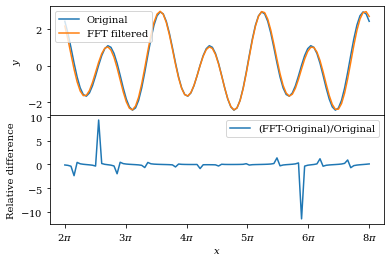

In [13]:
z = np.real_if_close(np.fft.ifft(g,norm='ortho'))
fig, ax = plt.subplots(nrows=2,sharex=True,gridspec_kw=dict(wspace=0,hspace=0))
ax[0].plot(x,y,label='Original')
ax[0].plot(x,z,label='FFT filtered')
ax[0].set_ylabel('$y$')
ax[0].legend()
ax[1].plot(x,(z-y)/y,label='(FFT-Original)/Original')
ax[1].set_xlabel('$x$')
ax[1].set_ylabel('Relative difference')
ticks =  np.linspace(x[0],x[-1],6)
ax[1].set_xticks(ticks)
ax[1].set_xticklabels([r'${}\pi$'.format(int(t/np.pi)) for t in ticks])
ax[1].legend();

We see that are reverse transform comes quite close to the original data.  We also see that the two modes we originally put in - those with a wavelength of $\pi$ and $2\pi$ - are indeed found, and their relative strengths and phases are relatively well determined. 

# Phase shift 

Suppose we have observations of to oscillating signals with different wavelengths and phases.  Now we would like to figure out the phase-shift between the two signals.  

Let us start by creating two data sets.  Both will have a frequency of 1.  The second will be phase shifted by $\pi/4$ relative to the first. 

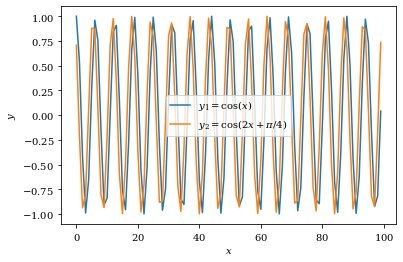

In [14]:
x  = np.arange(100)
y1 = np.cos(x)
y2 = np.cos(x+np.pi/4)

plt.figure()
plt.plot(x,y1,label=r'$y_1=\cos(x)$')
plt.plot(x,y2,label=r'$y_2=\cos(2x+\pi/4)$')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend();

We perform the DFT on both of these data sets 

In [15]:
f1 = np.fft.fft(y1,norm='ortho')
f2 = np.fft.fft(y2,norm='ortho')

Let plot the amplitudes and phases as a function of the frequencies. Note that we use the function `np.fft.fftshift` to rearrange the Fourier coefficients from negative frequencies to positive frequencies  

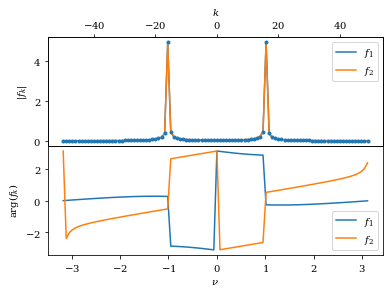

In [16]:
nu = np.fft.fftfreq(len(x),(x[-1]-x[0])/(2*np.pi)/len(x))
nus = np.fft.fftshift(nu)
f1s = np.fft.fftshift(f1)
f2s = np.fft.fftshift(f2)
k   = np.fft.fftfreq(len(nu),1/len(nu))
ks  = np.fft.fftshift(k)
fig,ax = plt.subplots(nrows=2,gridspec_kw=dict(hspace=0),sharex=True)
ax[0].plot(nus,np.abs(f1s),label='$f_1$')
ax[0].plot(nus,np.abs(f2s),label='$f_2$')
ax[0].set_ylabel(r'$|f_k|$')
ax[0].legend()
ax[1].plot(nus,np.angle(f1s),label='$f_1$')
ax[1].plot(nus,np.angle(f2s),label='$f_2$')
ax[1].set_xlabel(r'$\nu$')
ax[1].set_ylabel(r'$\mathrm{arg}(f_k)$')
ax[1].legend()
tax = ax[0].twiny()
tax.plot(ks,np.abs(f1s),'.')
tax.set_xlabel('$k$');

We want to extract the frequencies and phases of the most significant components of these two data sets.  Again, we use `np.argsort` to get an mapping of both Fourier transforms, sorting in descending amplitude.  Note, we are really only interested in the first $N/2$ components, so we ignore the negative frequencies. 

In [17]:
idx1 = np.flip(np.argsort(np.abs(f1[:len(x)//2])))
idx2 = np.flip(np.argsort(np.abs(f2[:len(x)//2])))

We print out the first most significant component of each data set

In [18]:
mm = [(idx[0],
       nu[idx[0]],
       1/np.abs(nu[idx[0]]),
       np.abs(ff[idx[0]]),
       np.angle(ff[idx[0]])) 
      for idx,ff in zip([idx1,idx2],[f1,f2])]
for kk,nn,ww,aa,pp in mm:
    print('Frequency: {:6.4g} ({:2d}) '
          'Wavelength: {:6.4g}*2pi '
          'Amplitude: {:6.4g} '
          'Phase: {:6.4g}'
          .format(nn,kk,ww,aa,pp))

Frequency:  1.015 (16) Wavelength: 0.9848*2pi Amplitude:  4.941 Phase: -0.266
Frequency:  1.015 (16) Wavelength: 0.9848*2pi Amplitude:  4.926 Phase: 0.5227


We can calculate the phase shift between these to waves by taking the difference between the phases, possibly adding or subtracting $2\pi$ to bring the difference into the range $[0,2\pi]$ 

In [19]:
dphase = np.angle(f2[idx2[0]])-np.angle(f1[idx1[0]])
if dphase > 2*np.pi: dphase -= 2*np.pi
if dphase < 0:       dphase += 2*np.pi
print('Phase difference is {:.3g}={:.3g}*pi'.format(dphase,dphase/np.pi))

Phase difference is 0.789=0.251*pi


Thus, we recover the phase shift of $\pi/4$ we put in originally. 

# Signal extraction - high and low pass filters

We have some data, and we are looking for the signal in that data.  The signal could be

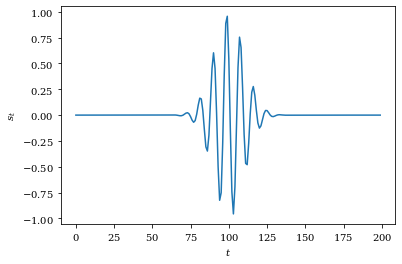

In [20]:
x      = np.arange(200)
N      = len(x)
signal = np.exp(-0.5*(x-N/2)**2/10**2)*np.sin(7*x)
plt.figure()
plt.plot(x,signal)
plt.xlabel(r'$t$')
plt.ylabel(r'$s_t$');

We have some low frequency (long wavelength) modulation from some external source.  In an AM radio broadcast, this modulation is on purpose - in fact, _AM_ stands for amplitude modulation. Here, however, we will assume it is an unknown nuisance which is added on top of the signal (not multiplied as in AM radio waves). 

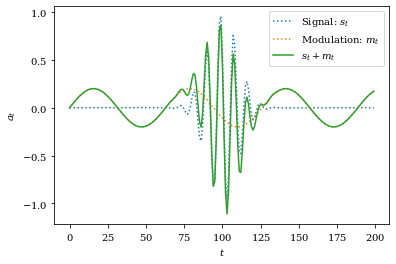

In [21]:
modulation = 0.2*np.sin(.1*x)
plt.figure()
plt.plot(x,signal,':',label=r'Signal: $s_t$')
plt.plot(x,modulation,':',label=r'Modulation: $m_t$')
plt.plot(x,signal+modulation,label=r'$s_t+ m_t$')
plt.legend()
plt.xlabel(r'$t$')
plt.ylabel(r'$a_t$');

Unfortunately, our instrument is not perfect, so we also have some background which varies rapidly

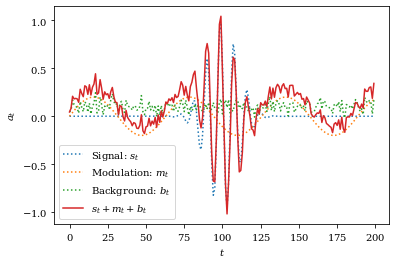

In [22]:
background = np.random.normal(0.1,0.05,size=N)
plt.figure()
plt.plot(x,signal,':',label=r'Signal: $s_t$')
plt.plot(x,modulation,':',label=r'Modulation: $m_t$')
plt.plot(x,background,':',label=r'Background: $b_t$')
plt.plot(x,signal+modulation+background,label=r'$s_t + m_t+b_t$')
plt.legend()
plt.xlabel(r'$t$')
plt.ylabel(r'$a_t$');

This looks like a pretty dire situation.  We have high-frequency noise ($b_t$) as well as low frequency modulation ($m_t$) which obscures our signal.   Fortunately, we can use DFT to extract the signal.  As before, we will start by doing the DFT on our data 

$$a_t= s_t + m_t + b_t\quad.$$

In [23]:
y   = signal + modulation + background
f   = np.fft.fft(y,norm='ortho')
nu  = np.fft.fftfreq(N,(x[-1]-x[0])/(2*np.pi)/N)
nus = np.fft.fftshift(nu)
fs  = np.fft.fftshift(f)
k   = np.fft.fftfreq(N,1/N) 
ks  = np.fft.fftshift(k)

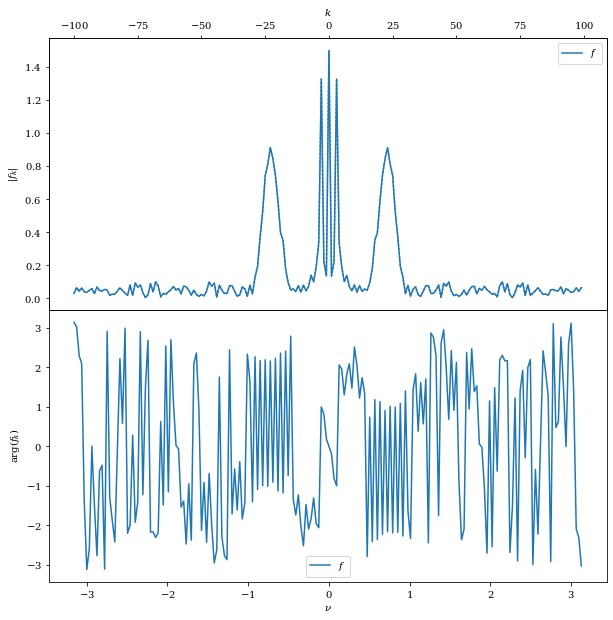

In [24]:
fig,ax = plt.subplots(nrows=2,gridspec_kw=dict(hspace=0),
                      sharex=True,figsize=(10,10))
ax[0].plot(nus,np.abs(fs),label='$f$')
ax[0].set_ylabel(r'$|f_k|$')
ax[0].legend()
ax[1].plot(nus,np.angle(fs),label='$f$')
ax[1].set_xlabel(r'$\nu$')
ax[1].set_ylabel(r'$\mathrm{arg}(f_k)$')
ax[1].legend()
tax = ax[0].twiny()
tax.plot(ks,np.abs(fs),':')
tax.set_xlabel('$k$');

What we want to do, is to remove the high-frequency noise first.  It is relatively easy to see that this can be done by zero'ing all the Fourier coefficients corresponding to large $|k|$. We expect the background to have frequency numbers $|k|>h_p = N/7$.  We will therefore zero all those components.  Furthermore, as we have reason to believe that the high frequency noise shifts our baseline, we will also zero modes with $|k|\leq 1$. 

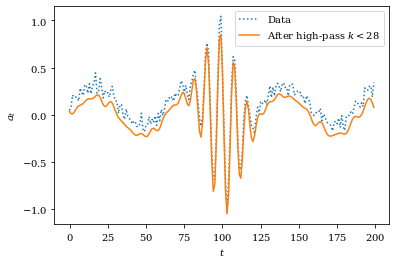

In [25]:
hp = N / 7
h = np.where(np.abs(k)< hp, f,0)
h = np.where(np.abs(k)> 1,  h,0)
yh = np.real_if_close(np.fft.ifft(h,norm='ortho'))
plt.figure()
plt.plot(x,y,':',label='Data')
plt.plot(x,yh,label='After high-pass $k<{}$'.format(int(hp)))
plt.xlabel('$t$')
plt.ylabel('$a_t$')
plt.legend();

We have removed a lot of the high-frequency noise simply by multiplying our frequency spectrum with a step function

$$\Theta(\nu) = \begin{cases} 1 & 1 < \nu<\nu_{h_p}\\ 0 & \text{otherwise}\end{cases}.$$

We can look at bit more at the frequency spectrum - in fact, we we want to plot the _power spectrum_ for positive frequencies.  The power spectrum is defined by the square amplitudes 

$$ p_k = |f_k|^2\quad.$$

We plot the _full_ power spectrum together with our high frequency cut $h_p$, as well as a guess on which low-frequencies to ignore $l_p=N/12$. 

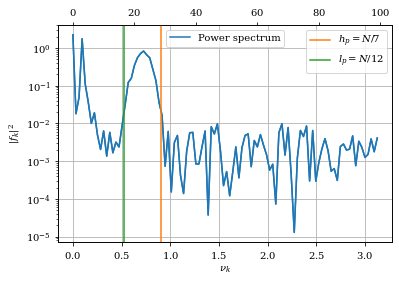

In [26]:
plt.figure()
plt.plot(nus[N//2:],np.abs(fs[N//2:])**2,label='Power spectrum')
plt.xlabel(r'$\nu_k$')
plt.ylabel(r'$|f_k|^2$')
plt.yscale('log')
plt.grid()
plt.legend(loc='upper center')
lp = N / 12
kax = plt.gca().twiny()
kax.plot(ks[N//2:],np.abs(fs[N//2:])**2);
kax.axvline(hp,color='tab:orange',label=r'$h_p=N/7$')
kax.axvline(lp,color='tab:green',label=r'$l_p=N/12$')
kax.legend(loc='upper right');

We see that below $l_p=N/12$ we have some large contributions which we believe to are not part of the signal.  Thus, we will multiply our frequency spectrum with another step function 

$$\Theta(\nu) = \begin{cases} 0 & \nu_k < \nu_{l_p}\\ 1 & \text{otherwise}\end{cases}\quad.$$

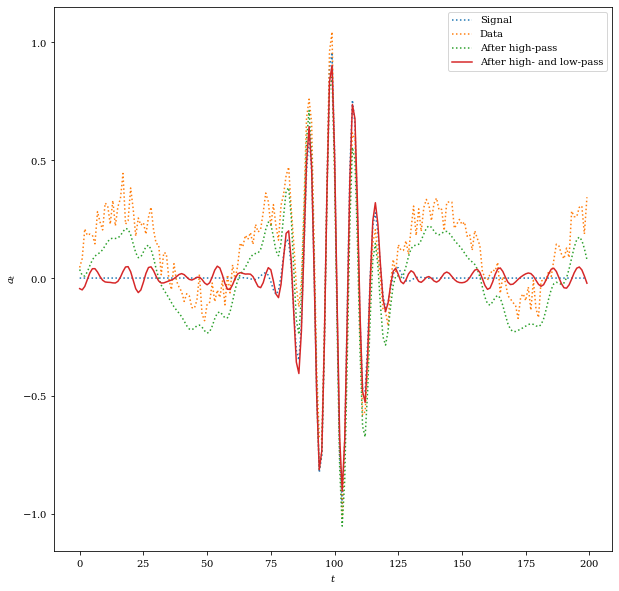

In [27]:
# lp = N / 14
l = np.where(np.abs(k) > lp, h, 0)
yl = np.real_if_close(np.fft.ifft(l,norm='ortho'))
plt.figure(figsize=(10,10))
plt.plot(x,signal,':',label='Signal')
plt.plot(x,y,':',label='Data')
plt.plot(x,yh,':',label='After high-pass')
plt.plot(x,yl,label='After high- and low-pass')
plt.xlabel(r'$t$')
plt.ylabel(r'$a_t$')
plt.legend();

We are now left with our signal (more or less).  It is certainly cleaner than what we started out with above.  As a final plot, we will show the difference between the deduced signal to our true signal. 

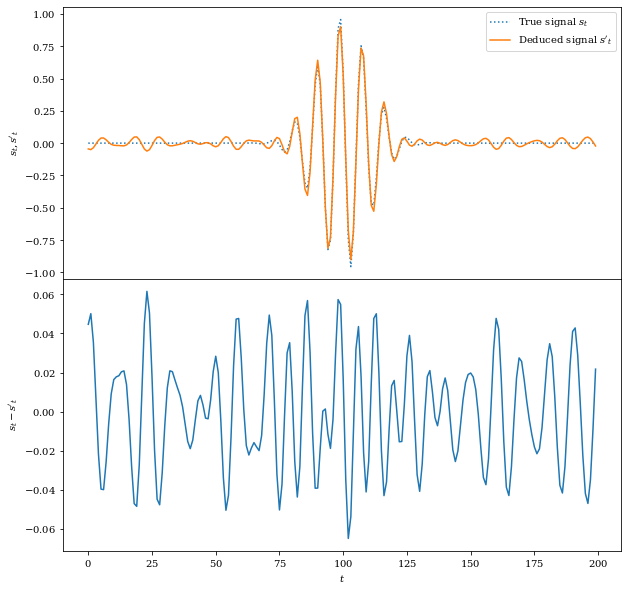

In [28]:
fig, ax = plt.subplots(nrows=2,gridspec_kw=dict(hspace=0),
                       sharex=True,figsize=(10,10))
ax[0].plot(x,signal,':',label='True signal $s_t$')
ax[0].plot(x,yl,label="Deduced signal $s'_t$")
ax[0].set_ylabel("$s_t,s'_t$")
ax[0].legend()
ax[1].plot(x,(signal-yl),label='Ratio')
ax[1].set_ylabel(r"$s_t-s'_t$")
ax[1].set_xlabel('$t$');